# Práctica 3

1238689 Montes Garay Lilyan Victoria

1201706 Torres Aragón Juan Jorge

**Ejercicio 1**

Utilizar las bibliotecas brindadas por el profesor para realizar la práctica. El alumno debe modelar el siguiente problema propuesto. Se requiere diseñar un controlador difuso para una lavadora, se le solicita al alumno que funga como experto del
dominio, por lo que deberá plasmar su expertis en un modelo computable, a través de reglas difusas. El sistema de lavado cuenta con sensores para: medir el peso de la carga y un sensor óptico para detectar el nivel de suciedad de la carga. Además el operador debería poder seleccionar de un catálogo (máximo 5 opciones) el tipo de ropa. Los elementos del sistema que se pueden afectar son: tiempo de lavado, tiempo de pre-lavado, intensidad de lavado, temperatura del agua, cantidad de detergente, cantidad de acondicionador, tiempo de enjuague, tiempo del ciclo de exprimido.

Dada las anteriores descripciones del sistema, el experto debe decidir cuáles son las variables de salida apropiadas para lograr los siguientes objetivos:

* Minimizar el tiempo de lavado
* Minimizar el agua empleada
* Minimizar la energía requerida
* Evitar daño en la ropa
* Minimizar el uso de detergentes

Proponer un Sistema de Inferencia Difuso que considere las entradas del sistema para mejora del ciclo de lavado de acuerdo a los objetivos propuestos por la empresa. En la documentación de este ejercicio, considerar:

* Por cada variable involucrada, justificar su función de membresía (tener en mente que es un proceso de percepción, por lo que se puede omitir algunos detalles cualitativos).
* Describir las reglas difusas 
    * Se puede describir todo el conjunto de reglas de forma general, o bien, una pequeña descripción con un ejemplo, por cada una de ellas.
* Realizar al menos 3 casos de prueba, describir cuanto se acerca el resultado del sistema con la decisión que el alumno hubiera considerado.


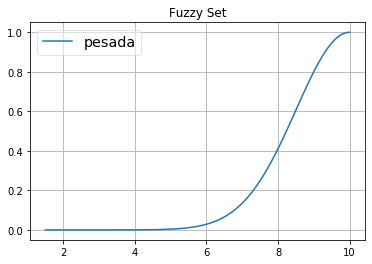

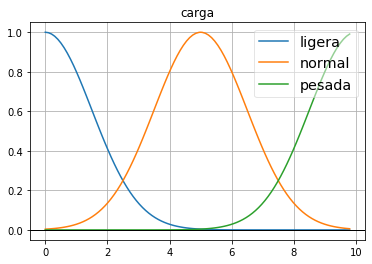

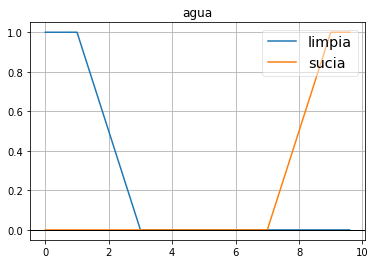

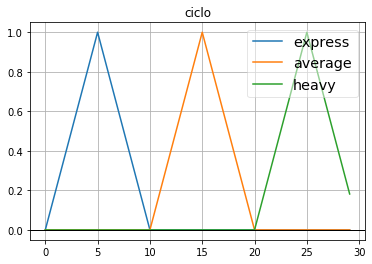


Evaluation of FIS with inputs:
carga: 8.183
agua: 8.59
	IF carga is ligera or agua is limpia THEN ciclo is express = [3.44789797e-07] with weight = 1
	IF carga is normal or agua is sucia THEN ciclo is average = [0.795] with weight = 1
	IF carga is pesada and agua is sucia THEN ciclo is heavy = [0.4801464] with weight = 1


In [10]:
from FuzzySystem.FuzzySet import  FuzzySet
from FuzzySystem.FuzzyVariable import  FuzzyVariable
from FuzzySystem.FuzzyInferenceSystem import  FuzzyInferenceSystem, Antecedent,Consequent, FuzzyRule 
from FuzzySystem.Defuzzifier import Centroid
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, GBellmf, Logmf, Tanhmf, Trapmf, Sigmoidmf, Cauchymf

#INPUTS

carga_ligera = FuzzySet('ligera', Gaussmf([1.5, 0]))
carga_normal = FuzzySet('normal', Gaussmf([1.5, 5]))
carga_pesada = FuzzySet('pesada', Gaussmf([1.5, 10]))
carga_pesada.show()
carga = FuzzyVariable('carga',[carga_ligera, carga_normal, carga_pesada], universe=[0, 10])
carga.show()

agua_limpia = FuzzySet('limpia', Trapmf([0,0,1,3]))
agua_sucia = FuzzySet('sucia', Trapmf([7,9,10,10]))
agua = FuzzyVariable('agua', [agua_limpia, agua_sucia], universe=[0, 10])
agua.show()

#OUTPUT

ciclo_express = FuzzySet('express', Trimf([0,5,10]))
ciclo_avg = FuzzySet('average', Trimf([10,15,20]))
ciclo_heavy = FuzzySet('heavy', Trimf([20,25,30]))
ciclo = FuzzyVariable('ciclo', [ciclo_express, ciclo_avg, ciclo_heavy], universe=[0, 30])
ciclo.show()

#RULES


#ant1  = Antecedent(carga['ligera'], conector=max)
#ant1.add(agua['limpia'])
ant1  = Antecedent(carga['ligera'] | agua['limpia'])
cont1 = Consequent([ciclo['express']])
rule1 = FuzzyRule(ant1, cont1)

ant2  = Antecedent(carga['normal'] | agua['sucia'])
cont2 = Consequent([ciclo['average']])
rule2 = FuzzyRule(ant2, cont2)


#ant3  = Antecedent(carga['pesada'], conector=min)
#ant3.add(agua['sucia'])
ant3 = Antecedent(carga['pesada']& agua['sucia'])
cont3 = Consequent([ciclo['heavy']])
rule3 = FuzzyRule(ant3, cont3)

#Building the FIS

fis = FuzzyInferenceSystem([rule1, rule2, rule3])

#FIS Evaluation

inputs = {'carga':8.183, 'agua':8.59}
result = fis.eval(inputs)
#print(result)

**Ejercicio 2**

Utilizar las bibliotecas brindadas por el profesor para realizar la práctica.

El alumno debe de proponer un problema en donde se realice una toma de decisión, en el cual, el alumno debe tener un nivel de expertis aceptable. Se deben cumplir con los siguientes requisitos:
    
* Mínimo 4 variables de entrada
* La cantidad mínima de salidas es uno (si el problema no es complejo, añada más)
* Mínimo 3 reglas difusas
Se deberá entregar un documento (tipo jupyter notebook ) que contenga los siguientes
puntos:
* Descripción del problema
    * Justificación; por qué es importante modelar este problema.
    * Especificar ejemplos de aplicación.
    * Describir cada una de las variables involucradas (entrada y salida).
* Por cada variable involucrada, justificar su función de membresía (tener en mente que es un proceso de percepción, por lo que se puede omitir algunos detalles cualitativos).
* Describir las reglas difusas
    * Se puede describir todo el conjunto de reglas de forma general, o bien, una pequeña descripción con un ejemplo, por cada una de ellas.
* Realizar al menos 3 casos de prueba, describir cuanto se acerca el resultado del sistema con la decisión que el alumno hubiera considerado.

In [5]:
"""Justificación: El mantenimiento de la salud de una pecera es mas complicado de lo que parece. 
    los errores fatales a causa de la ignorancia de las personas al comprar peces se ha normalizado
    lo cual es una situacion alarmante. En este sistema se regulan los principales factores que influyen
    en la salud de los peces: 
    
        1. La tempreatura del agua - cada especie de pez soporta solo cierta tempratura, al igual que los
        animales terrestres pueden sufrir de enfermedades o sobreenfriamiento.
        
        2. Banco de bacterias - aun teniendo el mejor filtro en una pecera es necesario que se formen bacterias benéficas
        para procesar el nitrogeno exesivo por los desechos de los peces.
        
        3. Luz - Esta variable esta directamente ligada con la tempreatura, mas para acuarios plantados es un elemento clave
        para un sistema exitoso y equilibrado.
        
        4. Comida - naturalmente asociamos a las porciones grandes de comida como "algo bueno" para los peces, sin embargo 
        estos tienden a dejar sobras si no se les da la cantidad correcta dando lugar a una pecera sucia y por lo tanto a 
        posibles infecciones..
"""

'Justificación: El mantenimiento de la salud de una pecera es mas complicado de lo que parece. \n    los errores fatales a causa de la ignorancia de las personas al comprar peces se ha normalizado\n    lo cial es una situacion alarmante. En este sistema se regulan los principales factores que influyen\n    en la salud de los peces: \n'

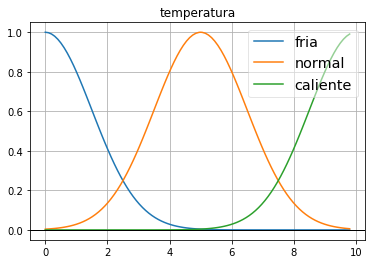

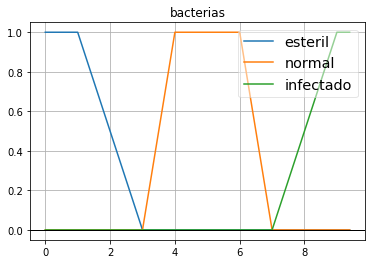

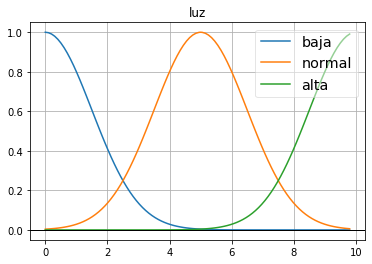

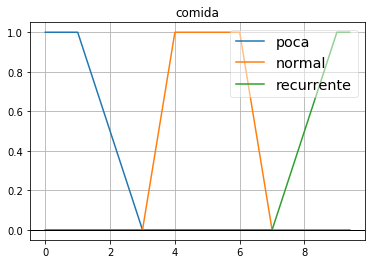

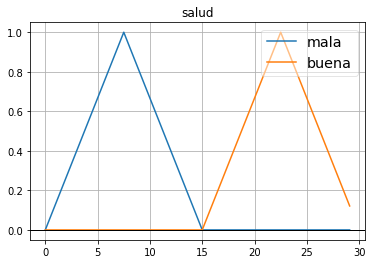


Evaluation of FIS with inputs:
luz: 5.89
temperatura: 8.7
bacterias: 6.5
comida: 5
	IF luz is baja and temperatura is fria and bacterias is esteril and comida is poca THEN salud is mala = 0.0004486104885353356 with weight = 1
	IF luz is normal and temperatura is normal and comida is normal and bacterias is normal THEN salud is buena = 0.047728707763164215 with weight = 1
	IF luz is alta and temperatura is caliente and bacterias is infectado and comida is recurrente THEN salud is mala = 0.6869075574573875 with weight = 1

Evaluation of FIS with inputs:
luz: 5.89
temperatura: 4.8
bacterias: 6.5
comida: 5
	IF luz is baja and temperatura is fria and bacterias is esteril and comida is poca THEN salud is mala = 0.005976022895005943 with weight = 1
	IF luz is normal and temperatura is normal and comida is normal and bacterias is normal THEN salud is buena = 0.5 with weight = 1
	IF luz is alta and temperatura is caliente and bacterias is infectado and comida is recurrente THEN salud is mala =

In [4]:
import FuzzySystem as fs

from FuzzySystem.FuzzySet import  FuzzySet
from FuzzySystem.FuzzyVariable import  FuzzyVariable
from FuzzySystem.FuzzyInferenceSystem import  FuzzyInferenceSystem, Antecedent,Consequent, FuzzyRule 
from FuzzySystem.Defuzzifier import Centroid
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, GBellmf, Logmf, Tanhmf, Trapmf, Sigmoidmf, Cauchymf

#INPUTS

temp_fria = FuzzySet('fria', Gaussmf([1.5, 0]))       #para esta variable se usa una funcion gaussiana ya que 
temp_normal = FuzzySet('normal', Gaussmf([1.5, 5]))   #la temperatura es un valor poco estable
temp_caliente = FuzzySet('caliente', Gaussmf([1.5, 10]))
temperatura = FuzzyVariable('temperatura',[temp_fria, temp_normal, temp_caliente], universe=[0, 10])
temperatura.show()

bact_esteril = FuzzySet('esteril',Gaussmf([1.5, 0])) #lo mismo que la temperatura
bact_normal = FuzzySet('normal', Gaussmf([1.5, 5]))
bact_infectado = FuzzySet('infectado',  Gaussmf([1.5, 10]))
bacterias = FuzzyVariable('bacterias', [bact_esteril, bact_normal, bact_infectado], universe=[0, 10])
bacterias.show()

#para las variables luz y comida se utilizo la funcion trapezoidal ya que
#son valores de los cuales se tiene mas control

luz_baja = FuzzySet('baja', Trapmf([0,0,1,3]))
luz_normal = FuzzySet('normal', Trapmf([3,4,6,7]))
luz_alta = FuzzySet('alta', Trapmf([7,9,10,10]))
luz = FuzzyVariable('luz', [luz_baja, luz_normal, luz_alta], universe=[0, 10])
luz.show()

comida_poca = FuzzySet('poca', Trapmf([0,0,1,3]))
comida_normal = FuzzySet('normal', Trapmf([3,4,6,7]))
comida_recurrente = FuzzySet('recurrente', Trapmf([7,9,10,10]))
comida = FuzzyVariable('comida', [comida_poca, comida_normal, comida_recurrente], universe=[0, 10])
comida.show()

#OUTPUT

salud_mala = FuzzySet('mala', Trimf([0,7.5,15]))
salud_buena = FuzzySet('buena', Trimf([15,22.5,30]))
salud = FuzzyVariable('salud', [salud_mala, salud_buena], universe=[0, 30])
salud.show()

#RULES

cont1 = Consequent([salud['mala']])
cont2 = Consequent([salud['buena']])

ant1  = Antecedent(luz['baja'], conector=max)
ant1.add(temperatura['fria'])
ant1.add(bacterias['esteril'])
ant1.add(comida['poca'])

rule1 = FuzzyRule(ant1, cont1)

ant2  = Antecedent(luz['normal'], conector = min)
ant2.add(temperatura['normal'])
ant2.add(comida['normal'])
ant2.add(bacterias['normal'])

rule2 = FuzzyRule(ant2, cont2)

ant3  = Antecedent(luz['alta'], conector=max)
ant3.add(temperatura['caliente'])
ant3.add(bacterias['infectado'])
ant3.add(comida['recurrente'])

rule3 = FuzzyRule(ant3, cont1)

#Building the FIS

fis = FuzzyInferenceSystem([rule1, rule2, rule3], and_op='prod', or_op='sum')

#FIS Evaluation

inputs1 = {'luz':5.89, 'temperatura':8.70, 'bacterias': 6.5 , 'comida': 5}
inputs2 = {'luz':5.89, 'temperatura':4.8, 'bacterias': 6.5 , 'comida': 5}
inputs3 = {'luz':3.4, 'temperatura':8.9, 'bacterias': 7.6 , 'comida': 7}

result1 = fis.eval(inputs1)
result2 = fis.eval(inputs2)
result3 = fis.eval(inputs3)
#print(result)

In [ ]:
"""
- output1; se puede ver el valor mayor fue 0.68 correspondiente a una mala salud del tanque, dio este resultado
ya que este sistema busca mantener un equilibrio entre los valores y en este caso la temperatura era demasiado alta

- output2; el valor mayor fue 0.5 correspondiente a una buena salud, fue el resultado esperado ya que los valores de entrada
estaban relativamente balanceados, oscilando cerca del 5

- output3; el valor mayor fue .76 correspondiente a una mala salud del tanque, dio este resultado ya que los valores de entrada
estaban muy lejos de llelgar a un equilibrio"""


**Ejercicio 3**

El alumno deberá describir (de forma breve) al menos 4 problemas en donde consideré que se podría aplicar un sistema de inferencia difuso y especificar la razón del por qué sería útil.

**Problema 1: Contabilidad electrónica**
Los sistemas de inferencia difusa sería muy útiles para la contabilidad electrónica ya que ésta debe de pasar por diversos filtros, es decir, debe de ser clasificada con distintas características específicas y después de dicha segregación, es codificada. 

**Problema 2: Análisis clínicos**
Para los análisis clínicos se necesitan diversos procesos y los resultados se van clasificando dependiendo de las características que muestren las muestras. Esta clasificación puede ser más fácil con la implementación de lógica difusa.

**Problema 3: Procedimientos médicos**
Muchas enfermedades son muy parecidas y es dificl distinguir entre una y otra, a su vez, los tratamientos para esas enfermedades puedes ser contrarios. En esos casos, la experiencia de los médicos es quien puede determinar la diferencia. En esos casos es conveniente utilizar un sistema de inferencia difuso para facilitar la toma de decisiones.

**Problema 4: Talleres automotrices**
Los automóviles se descomponen por diversas razones, pero no hay como un mecánico con muchos años de experiencia para determinar cuál es el verdadero problema que origina los demás. Con la implementación de un sistema de inferencia difuso se pueden ingresar los "malestares" que presenta el carro y acabar con el problema real que origina esos "síntomas", sin la necesidad de tener a un mecánico con toda esa experiencia.


**Ejercicio 4**

El alumno deberá escribir una discusión del de éste tipo de sistemas, de su perspectiva de, en donde considere los siguientes puntos:

* Cómo han impactado en la industria
* Cuáles son las ventajas y desventajas (hacer énfasis en esto último) del desarrollo e implementación de estos sistemas.
* Cuál se imagina que sea el futuro de estos sistemas (investigar los avances en este campo)
* ¿Estos sistemas serían útiles para representar toda clase de conocimiento?, justifique su respuesta

**Impacto de la lógica difusa en la industria**

La implementación de la lógica difusa en la industria es algo muy importante en la actualidad debido a lo mucho que puede facilitar algunos procesos. En el pasado se necesitaba de expertos que estuviesen disponibles todo el tiempo para evitar contratiempos. Con esto se están ahorrando salarios y se puede tener la base de conocimientos aún después de que el experto deje de laborar en la industria.

**Ventajas y desventajas del desarrollo e implementación de la lógica difusa**

Algunas de las ventajas son el ahorro de un experto permanente, es la fácil consulta de las diversas situaciones que pueden existir, esto refiriéndonos a su implementación. En cuanto al desarrollo, las ventajas son que podemos extendernos tanto como necesitemos con los escenarios.

Por otra parte, existen las desventajas de la lógica difusa. Para empezar, el desarrollo se ve afectado si no tenemos totalmente claro todos los posibles casos que se puedan llegar a presentar. En cuanto a la implementación, todo depende de la alimentación de información, es decir, si en un principio se ingresa información incorrecta o se parametriza de una manera no óptima, las consecuencias serán resultados erróneos o no ideales para cada caso.

**Futuro de la lógica difusa**

Lo que creemos que le depara a la lógica difusa es que mejorará. Es una forma nueva de ver el mundo, ya no todo es o blanco o negro, 1 o  0, ya existen grados intermedios sobre los que se pueden tomar decisiones. Si bien es cierto que es cambiante, las bases no deben de distanciarse tanto de lo que son ahora. Podemos ver cómo es que las redes neuronales están popularizándose en estos tiempos, al igual que se está implementanod la inteligencia artificial en distintos entornos como en la minería de datos o inclusive en la bolsa. Con la popularidad que obtuvo la inteligencia artificial gracias al Bitcoin y blockchain entre otros, el futuro de la lógica difusa es que siga siendo muy utilizado.

**Utilidad de los sistemas de lógica difusa en la representación del conocimiento**

Una de las grandes ventajas que tiene la lógica difusa en la representación del conocimiento es que uno nunca puede estar totalmente mal. A que nos referimos con esto, debido a que la lógica difusa no es binaria, existen diversos niveles y los podemos ampliar tanto como queramos, obteniendo con esto los resultados más cercanos a la realidad. Al tener más opciones pedemos clasificar todo de una mejor manera y a su vez, lo podemos adaptar a nuestras necesidades.